In [3]:
# This program detects if a patient has parkinson's disease
# https://www.youtube.com/watch?v=e0iiV9eCFQc

In [4]:
# Get the dependencies
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
# check data for missing values
df.isnull().values.any()

False

In [7]:
# Get the number of rows and columns in the dataframe
df.shape

(195, 24)

In [8]:
# get the target count
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [10]:
# let us identify the baseline

percent_has_disease = 147/(147+48)*100
percent_dont_have_disease = 48/(147+48)*100

print('if i guess the individual did not have parkinsons disease I would be correct ', percent_dont_have_disease, '% of the time')
print('if i guess the individual has parkinsons disease I would be correct ', percent_has_disease, '% of the time')


if i guess the individual did not have parkinsons disease I would be correct  24.615384615384617 % of the time
if i guess the individual has parkinsons disease I would be correct  75.38461538461539 % of the time


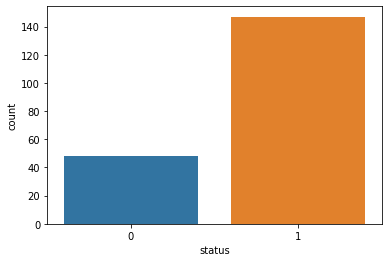

In [11]:
# Visualize the count
sns.countplot(df['status'])

In [12]:
# get the data types
df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [13]:
# create the feature dataset
X = df.drop(['name'], 1)
X = np.array(X.drop(['status'], 1))
y = np.array(df['status'])

In [14]:
# split the data into 80% training and 20% testing datasets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
# transform the feature data to be values between 0 and 1
sc = MinMaxScaler(feature_range = (0,1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [16]:
# Create the XGB Classifier
model = XGBClassifier().fit(x_train, y_train)

In [18]:
# Get the model's predicitons
predictions = model.predict(x_test)
predictions

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [19]:
y_test

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [20]:
# Get the model's accuracy, precision, recall and f1 score
print(classification_report(y_test, predicitons))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.94      0.97      0.95        30

    accuracy                           0.92        39
   macro avg       0.91      0.87      0.89        39
weighted avg       0.92      0.92      0.92        39

